# Customer Churn Prediction Model


This project aims to leverage historical customer data and machine learning algorithms to build an accurate churn prediction model.  
By identifying customers likely to churn, companies can take targeted actions to address their concerns,   
offer tailored incentives, or improve their overall experience,   
ultimately reducing customer attrition and its associated costs.

## Data

This dataset contains customer information and attributes relevant to assessing customer churn, which refers to the likelihood of customers leaving a service or company. The dataset's primary objective is to provide insights into customer behavior and help determine whether a customer will churn or not. Each row in the dataset represents a customer with specific attributes, and the "Churn" column indicates whether the customer has churned (1) or not (0).

Dataset Attributes:
- **CustomerId**: The unique identifier for each customer.
- **Surname**: The last name of the customer.
- **CreditScore**: The credit score of the customer.
- **Geography**: The geographical location of the customer.
- **Gender**: The gender of the customer.
- **Age**: The age of the customer.
- **Tenure**: The number of years the customer has been with the company.
- **Balance**: The account balance of the customer.
- **NumOfProducts**: The number of products the customer has with the company.
- **IsActiveMember**: Whether the customer is an active member (1) or not (0).
- **Churn**: Whether the customer has churned (1) or not (0).

## Machine Learning Task:
This dataset is suitable for a supervised binary classification task, where machine learning models   
can be trained to predict customer churn based on the provided attributes.   
The models aim to classify customers as churned (1) or not churned (0).


## Exploratory Data Analysis (EDA)
EDA is a crucial aspect of data science that helps in understanding the underlying structure of the data. It involves analyzing and summarizing data visually and statistically to uncover patterns or relationships. The main goals of EDA include:

## Gaining a deeper understanding of the data
- Identifying data quality issues
- Developing initial insights and hypotheses
- Selecting features for modeling or further analysis

In [3]:
# import modules
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2024-06-20 13:40:35.482927: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading and Read the dataset

In [4]:
# read the csv
df = pd.read_csv('data/Customer_Churn.csv')

# number of lows and columns
rows = df.shape[0]
columns = df.shape[1]

# print the number of rows and columns
print('Number of rows: ', rows)
print('Number of columns: ', columns)

# view the first 5 rows
df.head()

Number of rows:  10000
Number of columns:  13


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### DATA CLEANING

Check the missing data

Dealing with missing values is a crucial aspect of data cleaning and preprocessing, as missing data can lead to biased analysis and inaccurate results.

In [5]:
# check for missing values
missing = df.isnull().sum()

# print the missing values
print(missing)

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churned            0
dtype: int64


Now that we see that there are no missing values, let us check for unnecessary features among the ones in our dataset.

In [8]:
# drop the CustomerID column and the surname column
df = df.drop(['CustomerId', 'Surname'], axis=1)

# view the first 5 rows
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Exploration:
Exploring the data is the next step in the EDA process. It helps to identify patterns   
and trends and forms the basis of the data analysis phase.

### DATA VISUALIZATION
Data Visualization makes it easy to grasp the information the data express.

#### 1. pie chart
Let us check about potability, what is the percentage of churned customers and unchurned customers from our customers samples.

<Axes: ylabel='count'>

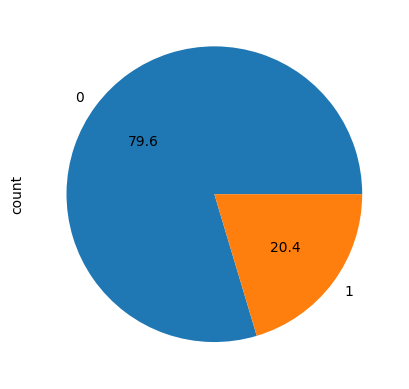

In [10]:
# plot the pie chart of the target variable
df['Churned'].value_counts().plot(kind='pie', autopct='%.1f')


This shows that only 20.4% percent of the customers recorded in our sample churned.

### 2. Correlation Map

Correlation maps can help identify patterns of association between variables and   
guide feature selection or identify potential multicollinearity issues in regression models.

### Convert Categorical Columns to Numerical

Since we need to include categorical columns in the correlation matrix, we must convert them to numerical values  
using techniques such as one-hot encoding or label encoding. 

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

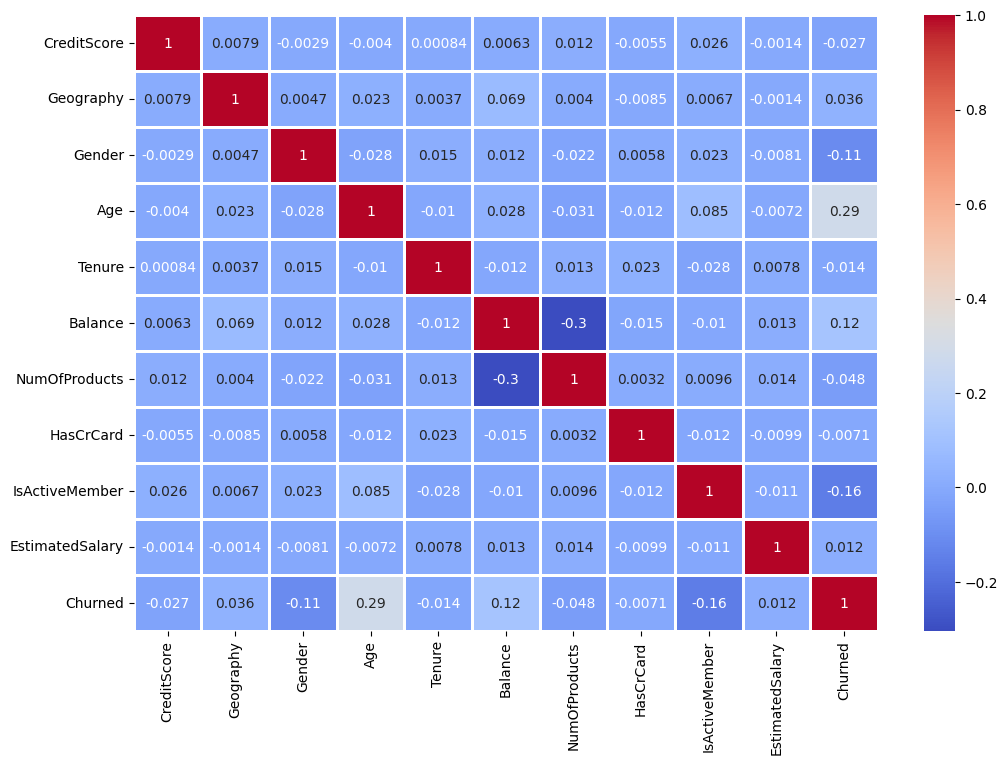

In [19]:
# plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=2)
plt.show()

Conclusion: generally our features have mixed correlation with each other.  
but the exception arises with customers number of products and their balance which shows a strong negative correlaton  
meaning as the number of products increases the balance tends to decrease and vice versa.

## Get the target and the features of the data

In the data set, we will go ahead to extract the features of the columns and at the same time   
get the target features in our case the churned column.

In [21]:
# split the data into features and target
X = df.drop('Churned', axis=1)
y = df['Churned']

# Display the X features
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


## Data Normalization

### Standard Scaler
Python sklearn library offers us with StandardScaler() function to standardize the data values into a standard format.

it transforms the distribution of each feature to have a mean of zero and a standard deviation of one.

This process ensures that all features are on the same scale, preventing any single feature from dominating the learning process due to its larger magnitude.

In [22]:
# make it a function for reusability
scaler = StandardScaler()


def normalize_data(X):
    normalized_data = scaler.fit_transform(X)
    return normalized_data

# normalize the data
X_normalized = normalize_data(X)

# print the normalized data
print(X_normalized[:5])

[[-0.32622142 -0.90188624 -1.09598752  0.29351742 -1.04175968 -1.22584767
  -0.91158349  0.64609167  0.97024255  0.02188649]
 [-0.44003595  1.51506738 -1.09598752  0.19816383 -1.38753759  0.11735002
  -0.91158349 -1.54776799  0.97024255  0.21653375]
 [-1.53679418 -0.90188624 -1.09598752  0.29351742  1.03290776  1.33305335
   2.52705662  0.64609167 -1.03067011  0.2406869 ]
 [ 0.50152063 -0.90188624 -1.09598752  0.00745665 -1.38753759 -1.22584767
   0.80773656 -1.54776799 -1.03067011 -0.10891792]
 [ 2.06388377  1.51506738 -1.09598752  0.38887101 -1.04175968  0.7857279
  -0.91158349  0.64609167  0.97024255 -0.36527578]]


Split the data into training and testing sets

In [24]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# print the shape of the training and testing sets
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


print('')
print('Splitting the data into training and validation sets')
print('')

# print the shape of the training and validation sets
print('X_train shape: ', X_train.shape)
print('X_val shape: ', X_val.shape)
print('y_train shape: ', y_train.shape)
print('y_val shape: ', y_val.shape)


X_train shape:  (8000, 10)
X_test shape:  (2000, 10)
y_train shape:  (8000,)
y_test shape:  (2000,)

Splitting the data into training and validation sets

X_train shape:  (6400, 10)
X_val shape:  (1600, 10)
y_train shape:  (6400,)
y_val shape:  (1600,)


# Building a Neural Network for Binary Classification using tensorflow

In the next cell, we define a function neural_net that constructs and compiles  
a neural network model using the TensorFlow Keras API. The function takes an optional parameter regularizer,  
which allows us to apply regularization or not to the Dense layers in the network.

In [26]:
# create a model function that takes in a regularizer
def model(regularizer=None):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])

    return model

Create an instance of our unregularized model

In [27]:
# unregularized model
unregularized_model = model(None)

# unregularized model summary
unregularized_model.summary()

/Users/macbook2015/ml/unchurn/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# train the unregularized model
unregularized_model_history = unregularized_model.fit(X_train, y_train, epochs=100, batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8853 - loss: 0.2886 - val_accuracy: 0.8569 - val_loss: 0.3478
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8825 - loss: 0.2814 - val_accuracy: 0.8556 - val_loss: 0.3549
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8866 - loss: 0.2751 - val_accuracy: 0.8500 - val_loss: 0.3559
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8947 - loss: 0.2560 - val_accuracy: 0.8594 - val_loss: 0.3620
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8854 - loss: 0.2702 - val_accuracy: 0.8487 - val_loss: 0.3610
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8920 - loss: 0.2696 - val_accuracy: 0.8625 - val_loss: 0.3613
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8904 - loss: 0.2609 - val_accuracy: 0.8550 - val_loss: 0.3640
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8934 - loss: 0.2546 - val_accu

Comment: For an unregularized model obviously there is a very huge overfitting that can be minimized  
considering a difference of 0.1769 and 1.117 in both accuracies and losses.

Meaning our model learned the train set itself instead of the pattern between features in this set.

### Avisual representantion of the performance of the Unregularized Model

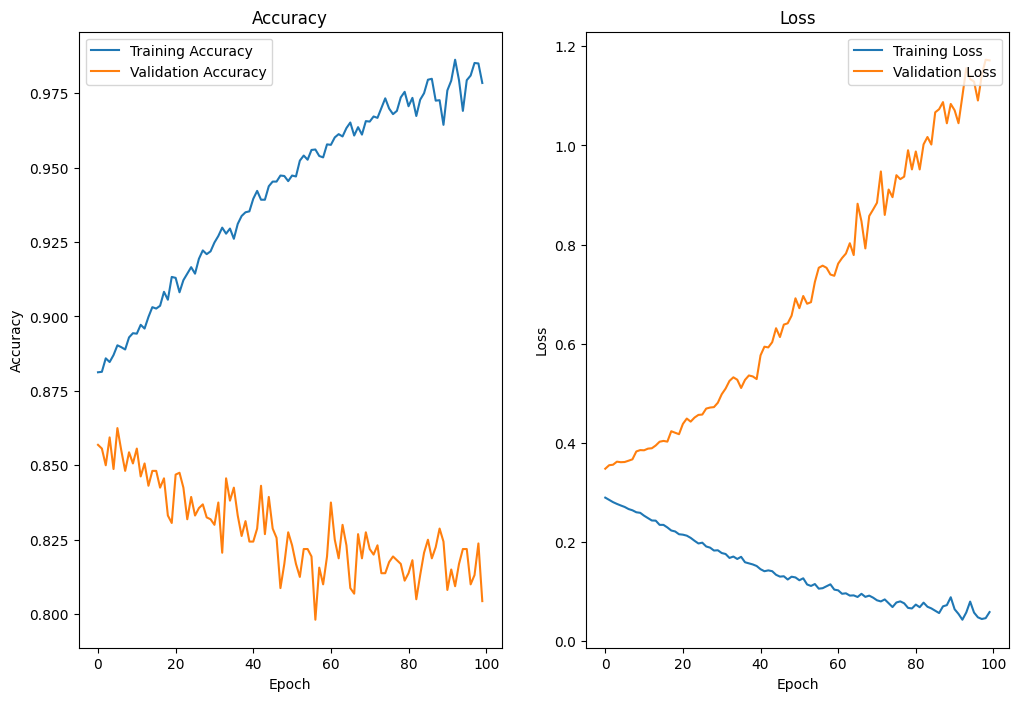

In [32]:
# plot the training and validation accuracy
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(unregularized_model_history.history['accuracy'], label='Training Accuracy')
plt.plot(unregularized_model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy')


# plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(unregularized_model_history.history['loss'], label='Training Loss')
plt.plot(unregularized_model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

### Save the unregularized model

In [34]:
from tensorflow import keras

# save unregularized model
unregularized_model.save('saved_models/unregularized_model.h5')